## Anomaly Score 받아오기

In [1]:
import cv2
from shutil import copyfile

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [ ]:
# argument
dataset_type = 'one'

In [3]:
import numpy as np
import pandas as pd
import pickle

# ano_score = np.load(f'save/four ensemble model/2_15_efficientnet_b6/model_4_anomaly_scores.npy')
# with open(f'save/four ensemble model/2_15_efficientnet_b6/final_ano_score.pickle', 'rb') as f:
#     ano_score = pickle.load(f)
with open(f'../save/무지부_코팅부/4_17_efficientnet_b6/five ensemble z_score.pickle', 'rb') as f:
    ano_score = pickle.load(f)
print(len(ano_score))

115


## Label 값 받아오기

In [5]:
# DATASET_PATH = f'/tf/KAIER_2022/Battery_data/{dataset_type}_class'
DATASET_PATH = f'/tf/Battery_data/무지부_코팅부_테이프제외2/코팅부'

from glob import glob
import os
def get_label(mode = 'test'):
    
#     if dataset_type == 'multi':
#         normal_names = ['코팅부 경계부 불량', '무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
#                      '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량']
#         abnormal_names = ['코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
#     elif dataset_type == 'one':
#         normal_names = ['코팅부 경계부 불량']
#         abnormal_names = ['무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
#                      '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량', '코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
        
    # ensemble model 
    normal_names = ['코팅부 경계부 불량', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프','코팅부 코팅불량']
    abnormal_names = ['코팅부 버블', '코팅부 흑점', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
    
    # one class model 
#     class_list = ['코팅부 경계부 불량','무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
#                      '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량', '코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
#     normal_names = '코팅부 미코팅'
#     abnormal_names = class_list.copy()
#     abnormal_names.remove(normal_names)

    fpattern = os.path.join(DATASET_PATH, f'{mode}/*/*.bmp')
    fpaths = sorted(glob(fpattern))
    
    # get only label name in data path 
    def split(x):
        return x.split('/')[-2]    

    test_class_list = list(map(split, fpaths))
    
    def change_name_to_label(x):
        if x in normal_names:
            return 0
        else:
            return 1

    test_label_list = list(map(change_name_to_label, test_class_list))

    return test_label_list, test_class_list, fpaths

In [6]:
label, classes, fpaths = get_label(mode='test')
print(len(label))

115


In [7]:
# AUROC 확인
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(label, ano_score)
print(auroc)

0.5278450363196125


In [12]:
## Test data에서 정상 데이터들은 정상 모델로 잘 분류가 되었는가?

argmin_array = np.load("../argmin_array.npy")  # 테스트 데이터가 들어갔을 때 어떤 모델이 선택됐는지 

len(argmin_array)

token = {'코팅부 경계부 불량':1,
         '코팅부 접힘':2,
         '코팅부 미코팅':3,
         '코팅부 줄무늬':4,
         '코팅부 테이프':5,
         '코팅부 코팅불량':6
        }

In [13]:
token.values()

dict_values([1, 2, 3, 4, 5, 6])

In [14]:
token2 = {y:x for x,y in zip(token.keys(), token.values())}

In [15]:
token2

{1: '코팅부 경계부 불량',
 2: '코팅부 접힘',
 3: '코팅부 미코팅',
 4: '코팅부 줄무늬',
 5: '코팅부 테이프',
 6: '코팅부 코팅불량'}

In [16]:
df = pd.DataFrame({"classes":classes, "selected model":argmin_array, "label":label, "predict label":pred, "fpath":fpaths})
df

,classes,selected model,label,predict label,fpath
0,코팅부 경계부 불량,1,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1,코팅부 경계부 불량,5,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
2,코팅부 경계부 불량,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
3,코팅부 경계부 불량,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
4,코팅부 경계부 불량,1,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
...,...,...,...,...,...
1826,코팅부 흑점,5,1,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1827,코팅부 흑점,5,1,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1828,코팅부 흑점,5,1,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1829,코팅부 흑점,1,1,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...


In [17]:
df['correct'] = df.label == df['predict label']
df

,classes,selected model,label,predict label,fpath,correct
0,코팅부 경계부 불량,1,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
1,코팅부 경계부 불량,5,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
2,코팅부 경계부 불량,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
3,코팅부 경계부 불량,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
4,코팅부 경계부 불량,1,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
...,...,...,...,...,...,...
1826,코팅부 흑점,5,1,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
1827,코팅부 흑점,5,1,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
1828,코팅부 흑점,5,1,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
1829,코팅부 흑점,1,1,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True


In [18]:
normal_df = df[df.label==0]
normal_df

,classes,selected model,label,predict label,fpath,correct
0,코팅부 경계부 불량,1,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
1,코팅부 경계부 불량,5,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
2,코팅부 경계부 불량,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
3,코팅부 경계부 불량,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
4,코팅부 경계부 불량,1,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
...,...,...,...,...,...,...
1813,코팅부 테이프,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
1814,코팅부 테이프,5,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True
1815,코팅부 테이프,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
1816,코팅부 테이프,5,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True


In [19]:
normal_df['classes_label'] = normal_df.loc[:,'classes'].apply(lambda x: token[x])
normal_df.head()

/tmp/ipykernel_24679/1584857193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df['classes_label'] = normal_df.loc[:,'classes'].apply(lambda x: token[x])


,classes,selected model,label,predict label,fpath,correct,classes_label
0,코팅부 경계부 불량,1,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True,1
1,코팅부 경계부 불량,5,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True,1
2,코팅부 경계부 불량,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False,1
3,코팅부 경계부 불량,5,0,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False,1
4,코팅부 경계부 불량,1,0,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,True,1


In [20]:
np.unique(normal_df.classes, return_counts=True)

# 선택된 모델과 실제 클래스가 다른 경우 
wrong_df = normal_df[normal_df['selected model'] != normal_df['classes_label']][['selected model', 'classes_label', 'fpath']]
wrong_df

,selected model,classes_label,fpath
1,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
2,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
3,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
5,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
7,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
...,...,...,...
1762,1,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1765,3,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1779,3,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1782,1,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...


잘못 분류된 비율 구하기 

In [21]:
wrong_df[wrong_df.classes_label == 1]

,selected model,classes_label,fpath
1,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
2,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
3,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
5,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
7,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
...,...,...,...
1354,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1355,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1356,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1357,5,1,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...


In [35]:
wrong_df[wrong_df.classes_label == label][['selected model', 'fpath']]

,selected model,fpath
1748,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1749,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1750,3,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1751,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1752,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1753,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1754,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1755,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1756,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
1757,5,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...


In [48]:
data

(1748,
 selected model                                                    5
 fpath             /home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...
 Name: 1748, dtype: object)

In [51]:
origin_file_path

'/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_old/코팅부/test/코팅부 코팅불량/1_116_1.bmp'

In [58]:
save_path = '../false selection model'
label = 6
for data in wrong_df[wrong_df.classes_label == label][['selected model', 'fpath']].iterrows():
    lbl, origin_file_path = data[1][0], data[1][1]
    if lbl == 5:
        file_name = origin_file_path.split('/')[-1]
        class_ = token2[label]
        new_file_path = os.path.join(f'{save_path}/{class_}', file_name)
        os.makedirs(f'{save_path}/{class_}', exist_ok=True)
        copyfile(origin_file_path, new_file_path)

In [67]:
?os.makedirs

Signature: os.makedirs(name, mode=511, exist_ok=False)
Docstring:
makedirs(name [, mode=0o777][, exist_ok=False])

Super-mkdir; create a leaf directory and all intermediate ones.  Works like
mkdir, except that any intermediate path segment (not just the rightmost)
will be created if it does not exist. If the target directory already
exists, raise an OSError if exist_ok is False. Otherwise no exception is
raised.  This is recursive.
File:      ~/anaconda3/lib/python3.8/os.py
Type:      function


In [48]:
np.unique(wrong_df[wrong_df.classes_label==1]['selected model'], return_counts=True)

(array([3, 5]), array([  9, 239]))

In [45]:
## 비정상 테스트 데이터 중 잘못 예측했을 때 어떤 모델이 선택되었는가?

abnormal_df = df[df.label==1]
abnormal_df.head()

abnormal_df[abnormal_df.correct==False]

,classes,selected model,label,predict label,fpath,correct
1482,코팅부 버블,5,1,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
1486,코팅부 버블,5,1,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
1818,코팅부 흑점,5,1,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
1819,코팅부 흑점,5,1,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
1828,코팅부 흑점,5,1,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False
1830,코팅부 흑점,5,1,0,/home/kaier/KAIER_2022/Battery_data/무지부_코팅부_ol...,False


## Threshold 잡기

max(tpr_fpr)가 되는 지점의 threshold

In [8]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(label, ano_score)
J = tpr-fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]


print("index : ", ix)
print("Best Threshold: ", best_thresh)
print("tpr: ", tpr[ix])
print("fpr: ", fpr[ix])

index :  49
Best Threshold:  1.3401906558494188
tpr:  0.9821428571428571
fpr:  0.7457627118644068


## ROC Curve

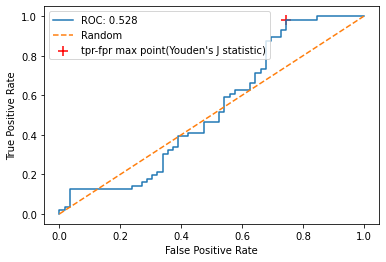

In [9]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label = "ROC: {:.3f}".format(auroc))
plt.scatter(fpr[ix], tpr[ix], marker = '+', s = 100, color = 'r', label = "tpr-fpr max point(Youden's J statistic)")
# plt.scatter(fpr[103], tpr[103], marker = '+', s = 100, color = 'black', label = 'fpr 0.2 point')
plt.plot([0.0, 1.0], [0.0, 1.0], '--', label = "Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [10]:
# Threshold를 반영한 예측값
pred = ano_score > best_thresh
print(pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False  True False False
 False  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False  True  True False  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


In [11]:
pred = list(map(int, pred))

In [13]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score
import scikitplot as skplt 

Compute AUROC

accuracy score: 0.6
recall: 0.9642857142857143
preicision: 0.5510204081632653


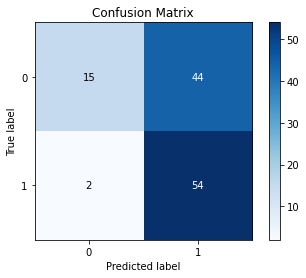

In [14]:
skplt.metrics.plot_confusion_matrix(y_true=label,y_pred=pred)
# plt.savefig(os.path.join(test_score_path, 'confusion_matrix.png'))
print("accuracy score: {}" .format(accuracy_score(label, pred)))
print("recall: {}" .format(recall_score (label, pred)))
print("preicision: {}" .format(precision_score(label, pred)))

false positive

In [15]:
pred = np.array(pred)
label = np.array(label)
fpaths = np.array(fpaths)

In [16]:
fp = fpaths[(pred==1)&(label==0)]
fp_class = list(map(lambda x: x.split('/')[-2], fp))
fp_counts = np.unique(np.array(fp_class), return_counts=True)
fp_counts

(array(['코팅부 경계부 불량', '코팅부 미코팅', '코팅부 접힘', '코팅부 줄무늬', '코팅부 코팅불량'],
       dtype='<U10'),
 array([12,  2, 12,  7, 11]))

In [22]:
fp_classes = fp_counts[0]
for x in fp_classes:
    os.makedirs(f'false prediction image/코팅부/false positive/{x}', exist_ok=True)

In [23]:
origin_file_path

'/tf/KAIER_2022/Battery_data/무지부_코팅부/코팅부/test/코팅부 테이프/8_12354_7.bmp'

In [26]:
for origin_file_path in fp:
    split_path = origin_file_path.split('/')
    file_name, cls = split_path[-1], split_path[-2]
    new_file_path = os.path.join(f'false prediction image/코팅부/false positive/{cls}/{file_name}')
    copyfile(origin_file_path, new_file_path)

false negative

In [35]:
fp = fpaths[(pred==0)&(label==1)]
fp_class = list(map(lambda x: x.split('/')[-2], fp))
fp_counts = np.unique(np.array(fp_class), return_counts=True)
fp_counts

(array(['코팅부 버블', '코팅부 흑점'], dtype='<U6'), array([2, 4]))

In [28]:
fp_classes = fp_counts[0]
for x in fp_classes:
    os.makedirs(f'false prediction image/코팅부/false negative/{x}', exist_ok=True)

In [29]:
for origin_file_path in fp:
    split_path = origin_file_path.split('/')
    file_name, cls = split_path[-1], split_path[-2]
    new_file_path = os.path.join(f'false prediction image/코팅부/false negative/{cls}/{file_name}')
    copyfile(origin_file_path, new_file_path)

In [36]:
fp

array(['/tf/KAIER_2022/Battery_data/무지부_코팅부/코팅부/test/코팅부 버블/1_10372_1.bmp',
       '/tf/KAIER_2022/Battery_data/무지부_코팅부/코팅부/test/코팅부 버블/2_10964_1.bmp',
       '/tf/KAIER_2022/Battery_data/무지부_코팅부/코팅부/test/코팅부 흑점/1_12346_10.bmp',
       '/tf/KAIER_2022/Battery_data/무지부_코팅부/코팅부/test/코팅부 흑점/2_2575_1.bmp',
       '/tf/KAIER_2022/Battery_data/무지부_코팅부/코팅부/test/코팅부 흑점/2_4262_1.bmp',
       '/tf/KAIER_2022/Battery_data/무지부_코팅부/코팅부/test/코팅부 흑점/6_12352_1.bmp'],
      dtype='<U70')

Compute PR AUC

In [704]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from numpy import argmax

In [705]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(label, ano_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# replace nan to 0
def delete_nan(x):
    if x != x:
        return 0 
    else:
        return x
new_fscore = list(map(delete_nan, fscore))
# locate the index of the largest f score
ix = argmax(new_fscore)

0.11196089384193017


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


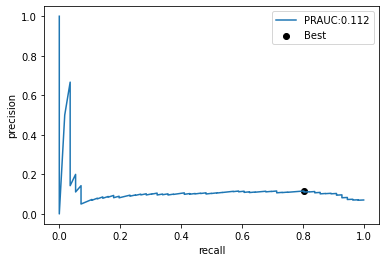

In [706]:
plt.plot(recall, precision, label='PRAUC:{:.3f}'.format(auc_precision_recall))
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()

In [707]:
best_threshold = thresholds[ix]
print("PR_AUC best threshold: {}".format(best_threshold))

PR_AUC best threshold: 0.953939610845096


In [708]:
len(thresholds)

795

In [709]:
# Threshold를 반영한 예측값
pred = ano_score > best_threshold
print(pred)

pred = list(map(int, pred))

print("accuracy score: {}" .format(accuracy_score(label, pred)))
print("recall: {}" .format(recall_score (label, pred)))
print("preicision: {}" .format(precision_score(label, pred)))

[False False  True ... False  True False]
accuracy score: 0.8061168760240306
recall: 0.7857142857142857
preicision: 0.11369509043927649


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

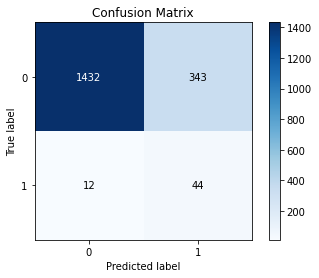

In [710]:
skplt.metrics.plot_confusion_matrix(y_true=label,y_pred=pred)

threshold 임의로 조정해서 accuracy 맞춰보자 

In [274]:
acc_best = 0 
ix_best = 0 
for i in range(len(thresholds)):
    new_ix = i
    new_threshold = thresholds[new_ix]
    # Threshold를 반영한 예측값
    pred = ano_score > new_threshold
#     print(pred)

    pred = list(map(int, pred))

#     print("accuracy score: {}" .format(accuracy_score(label, pred)))
#     print("recall: {}" .format(recall_score (label, pred)))
#     print("preicision: {}" .format(precision_score(label, pred)))
    
    acc = accuracy_score(label, pred)
    
    if acc > acc_best:
        acc_best = acc
        ix_best = new_ix

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True False]
[ True  True  True ...  True  True

In [276]:
acc_best

0.9581651376146789

In [109]:
recall[ix]

0.9674454232094982

In [110]:
precision[ix]

0.9600912200684151

In [85]:
recall

array([1.00000000e+00, 9.99617005e-01, 9.99234010e-01, ...,
       3.82995021e-04, 3.82995021e-04, 0.00000000e+00])

In [92]:
precision[precision<0.9]

array([0.88888889, 0.875     , 0.85714286, 0.83333333, 0.8       ,
       0.75      , 0.66666667, 0.5       ])

In [95]:
precision[-10:]

array([0.88888889, 0.875     , 0.85714286, 0.83333333, 0.8       ,
       0.75      , 0.66666667, 0.5       , 1.        , 1.        ])

In [97]:
recall[:10]

array([1.        , 0.999617  , 0.99923401, 0.99885101, 0.99846802,
       0.99808502, 0.99770203, 0.99731903, 0.99693604, 0.99693604])

In [98]:
precision[:10]

array([0.95851689, 0.95850165, 0.95848641, 0.95847115, 0.95845588,
       0.9584406 , 0.95842531, 0.95841001, 0.9583947 , 0.9587477 ])

In [99]:
thresholds[0]

2194.835208818052

In [93]:
thresholds[-10:]

array([20664.82774673, 20708.66342205, 21158.31074249, 21368.63307292,
       22238.17630622, 22392.69454042, 25285.69560535, 29322.86026323,
       34631.78738444, 63195.80746962])

In [56]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(label, pred)
print(matrix)

TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

print("False Negative, 이상을 정상으로 예측한 경우: ", FN, "건")
print("True Negative, 정상을 정상으로 예측한 경우: ", TN, "건")
print("False Positive, 정상을 이상으로 예측한 경우: ", FP, "건")
print("True Positive, 이상을 이상으로 예측한 경우: ", TP, "건")

[[ 316   33]
 [1645  731]]
False Negative, 이상을 정상으로 예측한 경우:  1645 건
True Negative, 정상을 정상으로 예측한 경우:  316 건
False Positive, 정상을 이상으로 예측한 경우:  33 건
True Positive, 이상을 이상으로 예측한 경우:  731 건


In [26]:
def check_false(pred,label, type_='positive'):
    if type_ == 'positive':
        _idx = np.where((np.array(pred)==1)&(np.array(label)==0))[0]
    else:
        _idx = np.where((np.array(pred)==0)&(np.array(label)==1))[0]
    
    print("false {}: {}" .format(type_, len(_idx)))
    
    false_unique = np.unique(np.array(classes)[_idx], return_counts=True)
    false_cls_name = false_unique[0]
    false_count = false_unique[1]
    
    return pd.DataFrame({'class':false_cls_name, 'count':false_count}).sort_values(by=['count'], ascending=False)

In [27]:
false_df = check_false(pred, label, type_='positive')

false positive: 918


In [28]:
false_df

,class,count
0,무지부 줄무늬,349
1,코팅부 경계부 불량,296
3,코팅부 접힘,170
2,코팅부 미코팅,103


In [151]:
fp_idx = np.where((np.array(pred)==1)&(np.array(label)==0))[0]

In [152]:
fp_unique = np.unique(np.array(classes)[fp_idx], return_counts=True)
fp_cls_name = fp_unique[0]
fp_count = fp_unique[1]

In [153]:
pd.DataFrame({'class':fp_cls_name, 'count':fp_count}).sort_values(by=['count'], ascending=False)

,class,count
1,무지부 줄무늬,72
8,코팅부 테이프,41
2,코팅부 경계부 불량,29
4,코팅부 미코팅,18
0,무지부 기재연결부,14
7,코팅부 코팅불량,8
5,코팅부 접힘,7
3,코팅부 기재연결부,2
6,코팅부 줄무늬,1


## visualize anomaly score

In [154]:
ano_score[np.array(label)==0]

array([1418.65162758, 1423.41538399, 1013.66748037, ..., 1593.84169704,
        897.23784236, 3841.49383481])

In [156]:
ano_score = np.array(ano_score)

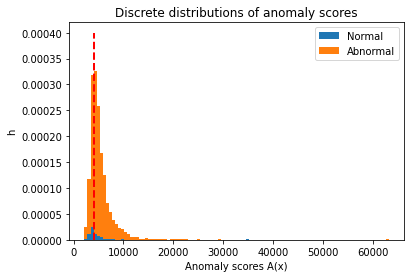

In [157]:
plt.hist([ano_score[np.array(label) == 0], ano_score[np.array(label) == 1]],
          bins=100, density=True, stacked=True,
          label=["Normal", "Abnormal"])
plt.title("Discrete distributions of anomaly scores")
plt.xlabel("Anomaly scores A(x)")
plt.ylabel("h")
plt.legend()
plt.vlines(best_thresh, 0, 0.0004, color='red', linestyle='--', linewidth=2)
plt.show()

In [29]:
Pre_cision = TP / (TP+FP)
Re_call = TP / (TP + FN)
Accu_racy = (TP + TN) / (TP + FN + FP + TN)

print("Precision: ", Pre_cision)
print("Recall : ", Re_call)
print("Accuracy: ", Accu_racy)

Precision:  0.4354243542435424
Recall :  0.965893587994543
Accuracy:  0.6539449541284403


In [45]:
#                예측 N(정상)    예측 P(이상)
# 실제 N(정상)  True Negative    False Positive
# 실제 P(이상)  False Negative   True Positive

# True Positive Rate = TP / (FN + TP) : 제대로 예측한 positive / 실제 positive, 실제 이상 이미지 중 얼마나 많이 잡아냈느냐
# False Positive Rate = FP / (TN + FP) : 정상인데 이상으로 예측한 것 / 실제 negative, 실제 정상 이미지 중 이상으로 예측한 비율

In [101]:
DATASET_PATH = '/workspace/CAMPUS/TOFU_Box/'

mode = 'test'
fpattern1 = os.path.join(DATASET_PATH,  f'{mode}/NG/*/*.jpg')
fpaths1 = sorted(glob(fpattern1))

fpattern2 = os.path.join(DATASET_PATH,  f'{mode}/OK/*/*.jpg')
fpaths2 = sorted(glob(fpattern2))

print(len(fpaths1))
print(len(fpaths2))

550
400


# 정상과 비정상에 대해서 각각 4개의 score 분포 비교 

## 이상인데 (Positive) 정상(Normal) 으로 예측한 것(False Negative) 확인

In [103]:
# [:550] 까지는 모두 이상인 데이터임.
FN_list = []
cnt = 0
for index, p in enumerate(pred[:550]):
    if p == False:
        cnt += 1
        print("index: ", index, "count: ", cnt, "FN data: ", fpaths1[index])
        FN_list.append(index)
    

index:  10 count:  1 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700560285.jpg
index:  14 count:  2 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153800050467.jpg
index:  48 count:  3 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153800450814.jpg
index:  64 count:  4 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-154000180378.jpg
index:  67 count:  5 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-154000280381.jpg
index:  70 count:  6 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/머리카락/2020-11-29-141700060813.jpg
index:  71 count:  7 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/머리카락/2020-11-29-141700090720.jpg
index:  72 count:  8 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/머리카락/2020-11-29-141700190565.jpg
index:  73 count:  9 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/머리카락/2020-11-29-141700220752.jpg
index:  74 count:  10 FN data:  /workspace/CAMPUS/TOFU_Box/test/NG/머리카락/2020-11-29-141700240968.jpg
index:  76 count:  

In [104]:
print(FN_list)

[10, 14, 48, 64, 67, 70, 71, 72, 73, 74, 76, 79, 80, 82, 83, 85, 86, 87, 90, 93, 94, 95, 96, 97, 98, 100, 101, 103, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 125, 126, 127, 129, 130, 132, 133, 134, 135, 137, 138, 139, 173, 174, 190, 201, 220, 222, 234, 236, 245, 276, 340, 341, 343, 345, 346, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 361, 362, 364, 366, 367, 368, 369, 370, 371, 373, 375, 378, 379, 380, 382, 384, 386, 387, 388, 389, 393, 395, 396, 397, 398, 399, 400, 403, 404, 409, 415, 418, 420, 424, 436, 443, 461, 462, 468, 485, 524]


In [105]:
# False Negative인 애들 anomaly score 값 저장하기
FN_score = []
for fn_idx in FN_list:
    print("FN Anomaly score: ", ano_score[fn_idx], "index: ", fn_idx, "image:", fpaths1[fn_idx])
    FN_score.append(ano_score[fn_idx])


FN Anomaly score:  797.2254558429365 index:  10 image: /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700560285.jpg
FN Anomaly score:  2895.953906060022 index:  14 image: /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153800050467.jpg
FN Anomaly score:  2076.192149534414 index:  48 image: /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153800450814.jpg
FN Anomaly score:  2690.8894775451045 index:  64 image: /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-154000180378.jpg
FN Anomaly score:  2856.8822177589755 index:  67 image: /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-154000280381.jpg
FN Anomaly score:  2848.0512828419187 index:  70 image: /workspace/CAMPUS/TOFU_Box/test/NG/머리카락/2020-11-29-141700060813.jpg
FN Anomaly score:  1104.5136812183264 index:  71 image: /workspace/CAMPUS/TOFU_Box/test/NG/머리카락/2020-11-29-141700090720.jpg
FN Anomaly score:  470.8380560452497 index:  72 image: /workspace/CAMPUS/TOFU_Box/test/NG/머리카락/2020-11-29-141700190565.jpg
FN Anomaly score:  923

In [106]:
FN_score.sort(reverse = True)
print(FN_score)

[2989.307186886901, 2955.5353428928647, 2931.187265526387, 2895.953906060022, 2856.8822177589755, 2848.0512828419187, 2815.1485005154973, 2806.0497203804553, 2775.8710177192697, 2752.824470985215, 2690.8894775451045, 2538.5685315879236, 2536.2708940189186, 2536.042915685005, 2494.345447552701, 2486.3795221515466, 2442.320863665198, 2372.0694778971956, 2360.646206033096, 2326.4630162012763, 2275.267100139172, 2260.039626029048, 2248.3913357447163, 2227.9050920881564, 2224.280314141729, 2222.385424399632, 2188.041059464158, 2168.4733960637823, 2076.192149534414, 2051.974896384927, 2022.5601205112616, 1978.6530642622383, 1967.439003168547, 1905.5082267506223, 1890.561412281444, 1868.9218019180698, 1852.2072290182987, 1851.7472104838816, 1815.9659460166731, 1804.468777095472, 1765.5170317488592, 1742.91306585056, 1714.4447711274647, 1700.0145098997746, 1646.652327446628, 1622.9418619010394, 1608.6801000097187, 1601.5107826664607, 1493.0780848655122, 1477.7471580929705, 1469.4808587270309, 

## 정상인데 (Negative) 이상으로 예측된 경우 (False Positive)

In [107]:
# [550:] 까지는 모두 정상인 데이터임.
FP_list = []
cnt = 0
for index, p in enumerate(pred[550:]):
    if p == True:
        cnt += 1
        print("index: ", index+550, "count: ", cnt, "image: ", fpaths2[index])
        FP_list.append(index+550)
    

index:  559 count:  1 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900460072.jpg
index:  652 count:  2 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-134200030380.jpg
index:  720 count:  3 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-29-113800360468.jpg
index:  734 count:  4 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-29-113900200941.jpg
index:  750 count:  5 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상B/2020-11-24-131600520464.jpg
index:  774 count:  6 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상B/2020-11-24-133300520173.jpg
index:  776 count:  7 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상B/2020-11-24-133300590860.jpg
index:  779 count:  8 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상B/2020-11-24-133400010625.jpg
index:  790 count:  9 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상B/2020-11-24-133500290359.jpg
index:  795 count:  10 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상B/2020-11-24-133600060804.jpg
index:  815 count:  11 image:

In [33]:
print(FP_list)

[591, 712, 719, 720, 734, 738, 739, 766, 770, 772, 774, 775, 778, 779, 780, 781, 790, 794, 795, 797, 808, 814, 815, 820, 837, 847, 852, 854, 879, 884, 901, 907, 909, 921, 923, 924, 925, 930, 936, 939, 942, 947]


In [34]:
# False Negative인 애들 anomaly score 값 저장하기
FP_score = []
for fn_idx in FP_list:
    print("FP Anomaly score: ", ano_score[fn_idx], "index: ", fn_idx, "image: ", fpaths2[fn_idx-550])
    FP_score.append(ano_score[fn_idx])


FP Anomaly score:  8251.24910324812 index:  591 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-134000150468.jpg
FP Anomaly score:  17839.442697471008 index:  712 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-29-113800190658.jpg
FP Anomaly score:  6015.349350051643 index:  719 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-29-113800350939.jpg
FP Anomaly score:  22048.573624121957 index:  720 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-29-113800360468.jpg
FP Anomaly score:  14960.126290889457 index:  734 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-29-113900200941.jpg
FP Anomaly score:  6871.024883223336 index:  738 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-29-113900320032.jpg
FP Anomaly score:  8576.873877353655 index:  739 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-29-113900330899.jpg
FP Anomaly score:  8790.525978404912 index:  766 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상B/2020-11-24-133300150776.jpg
FP Ano

In [35]:
FP_score.sort(reverse = True)
print(FP_score)

[22048.573624121957, 21153.533833313966, 19031.737411486603, 17839.442697471008, 14960.126290889457, 14822.36756852828, 13971.024202106986, 13248.93567936619, 12641.34503210336, 12053.118268344551, 11832.823109586956, 11091.83946076408, 9899.5741333802, 9377.303194614826, 8904.999617261812, 8790.525978404912, 8576.873877353655, 8496.584339691326, 8465.880032366607, 8453.586842928082, 8438.398766620317, 8274.138983940938, 8251.24910324812, 8119.492801309874, 8081.419512911699, 7944.71329748712, 7766.351481130463, 7743.869719389826, 7743.4987060951535, 7139.115717173321, 7072.099595056848, 7043.907553559789, 6988.667533686385, 6887.964148453437, 6871.024883223336, 6696.632095174398, 6458.853207917107, 6412.384691959247, 6373.843059917272, 6293.973277020993, 6225.8631347138435, 6015.349350051643]


## 이상인데 이상으로 판단한 경우(True Positive)

In [36]:
# [:550] 까지는 모두 이상인 데이터임.
TP_list = []
for index, p in enumerate(pred[:550]):
    if p == True:
        print("index: ", index)
        TP_list.append(index)
    

index:  0
index:  1
index:  2
index:  3
index:  4
index:  5
index:  6
index:  7
index:  8
index:  9
index:  11
index:  12
index:  13
index:  14
index:  15
index:  16
index:  17
index:  18
index:  19
index:  20
index:  21
index:  22
index:  23
index:  24
index:  25
index:  26
index:  27
index:  28
index:  29
index:  30
index:  31
index:  32
index:  33
index:  34
index:  35
index:  36
index:  37
index:  38
index:  39
index:  40
index:  41
index:  42
index:  43
index:  44
index:  45
index:  46
index:  47
index:  48
index:  49
index:  50
index:  51
index:  52
index:  53
index:  54
index:  55
index:  56
index:  57
index:  58
index:  59
index:  60
index:  61
index:  62
index:  63
index:  64
index:  65
index:  66
index:  68
index:  69
index:  70
index:  71
index:  74
index:  75
index:  76
index:  77
index:  78
index:  79
index:  80
index:  81
index:  82
index:  83
index:  84
index:  86
index:  87
index:  89
index:  90
index:  91
index:  92
index:  93
index:  94
index:  95
index:  96
index:  9

In [65]:
print(TP_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 76, 77, 78, 79, 81, 83, 84, 86, 88, 89, 90, 91, 92, 93, 95, 96, 98, 99, 102, 104, 105, 107, 108, 112, 113, 114, 117, 118, 119, 120, 122, 123, 124, 126, 128, 131, 135, 136, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 251, 252, 

In [66]:
# True Positive인 애들 anomaly score 값 저장하기
TP_score = []
for idx in TP_list:
    print("TP Anomaly score: ", ano_score[idx], "index: ", idx, "image: ", fpaths1[idx])
    TP_score.append(ano_score[idx])


TP Anomaly score:  3974.613883417973 index:  0 image:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700430393.jpg
TP Anomaly score:  19705.21028649062 index:  1 image:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700480726.jpg
TP Anomaly score:  14929.092516615521 index:  2 image:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700490135.jpg
TP Anomaly score:  44833.11035246216 index:  3 image:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700490655.jpg
TP Anomaly score:  11959.611392053775 index:  4 image:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700500466.jpg
TP Anomaly score:  7629.164235201292 index:  5 image:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700520507.jpg
TP Anomaly score:  10129.50240821143 index:  6 image:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700520925.jpg
TP Anomaly score:  10540.19294463305 index:  7 image:  /workspace/CAMPUS/TOFU_Box/test/NG/금속/2020-11-29-153700530615.jpg
TP Anomaly score:  27995.22881

In [67]:
TP_score.sort(reverse = True)
print(TP_score)

[111525.60733040981, 78655.97655953218, 64565.60044147074, 63548.39068527892, 61133.07817997411, 59411.673543149605, 57152.52662371658, 52482.455746416, 51976.12677703053, 49266.155681326985, 47124.18282338977, 46612.77731729547, 46520.59305048734, 46272.83395475149, 46067.11633114144, 44833.11035246216, 44405.965437188745, 43508.79534860188, 42812.65003381048, 40767.78874844313, 40483.15003249096, 40243.34838002175, 39631.22328083217, 38541.807783614844, 38269.54649236501, 37862.42977851513, 37362.360762029886, 36650.915112673436, 36576.92499453155, 36341.64962104149, 35935.03962730368, 35543.68581279181, 35467.29284623265, 35200.60821208855, 35158.63156992826, 34728.756761611956, 34633.93821447436, 34526.100414987886, 34222.350330058485, 34138.15875775367, 33998.39473827183, 31200.591124027964, 30990.12147827364, 30712.252622873755, 30439.125405952334, 30352.510255986825, 30224.23089243937, 29865.362911707827, 29628.895504731685, 29528.53490273158, 29459.473086058395, 29002.478869509

## True Negative (정상인데 정상으로 판단한 경우)

In [68]:
# [550:] 까지는 모두 이상인 데이터임.
TN_list = []
for index, p in enumerate(pred[550:]):
    if p == False:
        print("index: ", index+550)
        TN_list.append(index+550)
    

index:  550
index:  551
index:  552
index:  553
index:  554
index:  555
index:  556
index:  557
index:  558
index:  560
index:  561
index:  562
index:  563
index:  564
index:  565
index:  566
index:  567
index:  568
index:  569
index:  570
index:  571
index:  572
index:  573
index:  574
index:  575
index:  576
index:  578
index:  579
index:  581
index:  582
index:  584
index:  585
index:  586
index:  587
index:  588
index:  589
index:  590
index:  592
index:  593
index:  594
index:  595
index:  596
index:  597
index:  598
index:  599
index:  600
index:  601
index:  602
index:  603
index:  604
index:  605
index:  606
index:  607
index:  608
index:  609
index:  610
index:  611
index:  612
index:  613
index:  614
index:  615
index:  616
index:  617
index:  618
index:  619
index:  620
index:  621
index:  622
index:  623
index:  624
index:  625
index:  626
index:  627
index:  628
index:  629
index:  630
index:  631
index:  632
index:  633
index:  634
index:  635
index:  636
index:  637
inde

In [69]:
print(TN_list)

[550, 551, 552, 553, 554, 555, 556, 557, 558, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 578, 579, 581, 582, 584, 585, 586, 587, 588, 589, 590, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 713, 714, 716, 717, 718, 719, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 748, 749, 751, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 764,

In [70]:
# True Positive인 애들 anomaly score 값 저장하기
TN_score = []
for idx in TN_list:
    print("TN Anomaly score: ", ano_score[idx], "index: ", idx, "image: ", fpaths2[idx-550])
    TN_score.append(ano_score[idx])

TN Anomaly score:  176.12712568352435 index:  550 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900350125.jpg
TN Anomaly score:  351.7693046524146 index:  551 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900350732.jpg
TN Anomaly score:  208.49487607177798 index:  552 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900360241.jpg
TN Anomaly score:  102.27590845157556 index:  553 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900360837.jpg
TN Anomaly score:  162.1974991821553 index:  554 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900370430.jpg
TN Anomaly score:  330.8086011168598 index:  555 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900380030.jpg
TN Anomaly score:  880.2924588014637 index:  556 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900420811.jpg
TN Anomaly score:  124.77748810054982 index:  557 image:  /workspace/CAMPUS/TOFU_Box/test/OK/정상A/2020-11-24-133900430415.jpg
TN A

In [71]:
TN_score.sort(reverse = True)
print(TN_score)

[1303.7842614665205, 1290.0845946581976, 1285.2624409072887, 1284.735608044686, 1276.4904701392225, 1263.4208228962452, 1262.55385963757, 1257.930692449183, 1251.8228238160568, 1250.8350758026354, 1244.1665495655498, 1243.5141323200078, 1230.6601974822697, 1227.925517064985, 1219.3828409364603, 1185.6141914580949, 1163.6435076845592, 1143.8027559759066, 1131.1185574500414, 1120.6959438918857, 1107.6458985238787, 1095.3676082240418, 1089.4141863928526, 1079.6123927653534, 1071.0509058973985, 1062.338474111486, 1059.356380295707, 1054.1396180377226, 1043.2128659117734, 1042.553076703567, 1036.2051316178768, 1035.6576224958917, 1021.4316402828699, 1012.7691396378796, 996.6709210440167, 980.0872398340143, 978.8645572934474, 976.4536945931613, 973.6249096723137, 966.6662457583152, 964.0517346209148, 963.9183863217477, 963.1973331701657, 953.1683349876355, 951.2793203304657, 949.6086303194897, 941.9074202975025, 929.5366523987225, 916.8060916322138, 910.3826843147981, 882.6524723187104, 880.

## 실제 이미지 데이터 확인하기

In [15]:
DATASET_PATH = '/workspace/CAMPUS/TOFU_data_20p_trim/'

mode = 'test'
fpattern1 = os.path.join(DATASET_PATH,  f'{mode}/NG/*/*.jpg')
fpaths1 = sorted(glob(fpattern1))

fpattern2 = os.path.join(DATASET_PATH,  f'{mode}/OK/*/*.jpg')
fpaths2 = sorted(glob(fpattern2))

print(len(fpaths1))
print(len(fpaths2))

550
400


In [66]:
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "OK", "정상B"))))
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "OK", "정상A"))))
#os.rmdir(os.path.join(DATASET_PATH, "train", "OK", ".ipynb_checkpoints"))

200
200


In [50]:
import os

print(os.listdir(os.path.join(DATASET_PATH, "test", "NG")))


#os.rmdir(os.path.join(DATASET_PATH, "test", "NG", ".ipynb_checkpoints"))

['머리카락', '상단불량D', '탄화물', '금속', '플라스틱', '유바', '상단불량E', '벌레']


In [54]:
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "NG", "머리카락"))))
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "NG", "상단불량D"))))
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "NG", "탄화물"))))
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "NG", "금속"))))
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "NG", "플라스틱"))))
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "NG", "유바"))))
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "NG", "상단불량E"))))
print(len(os.listdir(os.path.join(DATASET_PATH, "test", "NG", "벌레"))))

70
50
70
70
70
70
80
70
